In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
#importamos el dataset
# Lee el archivo CSV.
# El argumento 'parse_dates' le dice a pandas qué columna(s) debe interpretar como fechas.
df = pd.read_csv('/Users/lucianayelicich/Desktop/Adalab/bda-modulo-3-evaluacion-final-lucianayelicich/Data/archivo_aviacion_final.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Loyalty Number,Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,0,100018,2017-01-01,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,1,100102,2017-01-01,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,80078.584644,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,2,100140,2017-01-01,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79948.034131,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,3,100214,2017-01-01,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,4,100272,2017-01-01,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   403760 non-null  int64         
 1   Loyalty Number               403760 non-null  int64         
 2   Date                         403760 non-null  datetime64[ns]
 3   Flights Booked               403760 non-null  int64         
 4   Flights with Companions      403760 non-null  int64         
 5   Total Flights                403760 non-null  int64         
 6   Distance                     403760 non-null  int64         
 7   Points Accumulated           403760 non-null  float64       
 8   Points Redeemed              403760 non-null  int64         
 9   Dollar Cost Points Redeemed  403760 non-null  int64         
 10  Country                      403760 non-null  object        
 11  Province                  

1 . ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
bins = np.arange(0,13,1)

In [5]:
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
df_vuelos_por_mes = df.groupby('Date')['Flights Booked'].sum().reset_index()

# Ordenar los datos por fecha
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

In [7]:
df_vuelos_por_mes.head()

,Date,Flights Booked
0,2017-01-01,47766
1,2017-02-01,47691
2,2017-03-01,64271
3,2017-04-01,55720
4,2017-05-01,65279


In [8]:
valores_unicos = df_vuelos_por_mes['Date'].unique()

print(valores_unicos)

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-12-01 00:00:00',
 '2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '2018-07-01 00:00:00', '2018-08-01 00:00:00', '2018-09-01 00:00:00',
 '2018-10-01 00:00:00', '2018-11-01 00:00:00', '2018-12-01 00:00:00']
Length: 24, dtype: datetime64[ns]


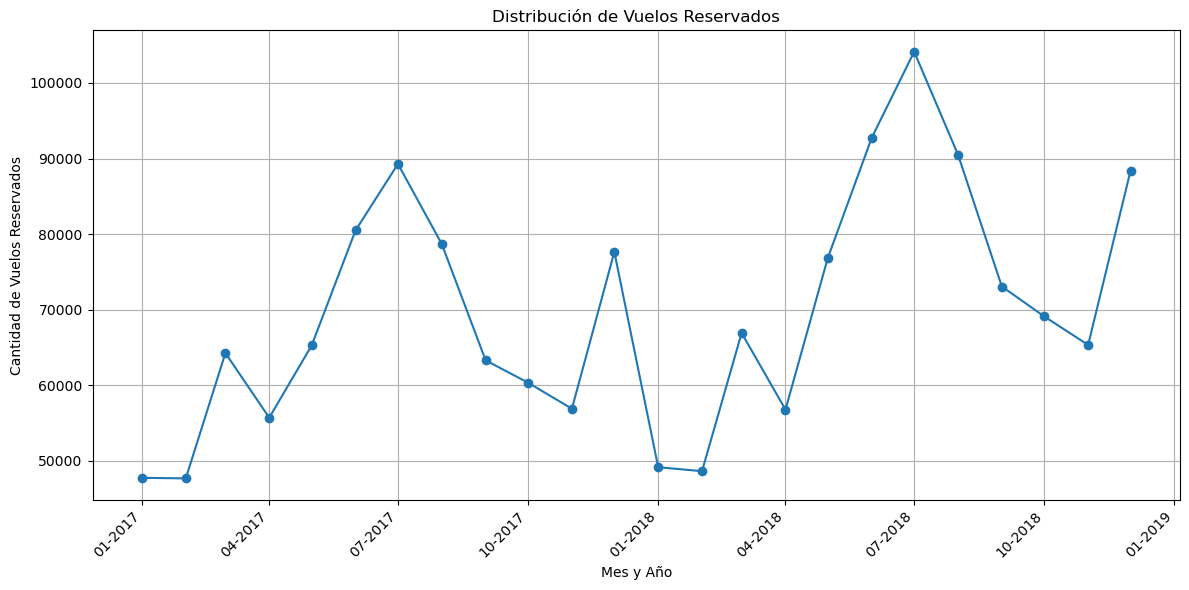

In [9]:
# 1. Define las fechas de inicio y fin para el filtro
start_date = '2017-01-01'
end_date = '2018-12-31'

# 2. Filtra el DataFrame para incluir solo el rango de fechas deseado
# Usamos una máscara booleana para seleccionar las filas.
df_filtrado = df_vuelos_por_mes[
    (df_vuelos_por_mes['Date'] >= start_date) & 
    (df_vuelos_por_mes['Date'] <= end_date)
]

# 3. Ordena el DataFrame filtrado por la columna 'Date'
df_filtrado = df_filtrado.sort_values(by='Date')

# 4. Crea el gráfico
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Formatea el eje X para mostrar solo mes y año
date_format = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_format)

# Grafica los datos del DataFrame filtrado
plt.plot(df_filtrado['Date'], df_filtrado['Flights Booked'], marker='o', linestyle='-')

# Añade etiquetas y título
plt.title('Distribución de Vuelos Reservados')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(True)

# Mejora la legibilidad de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

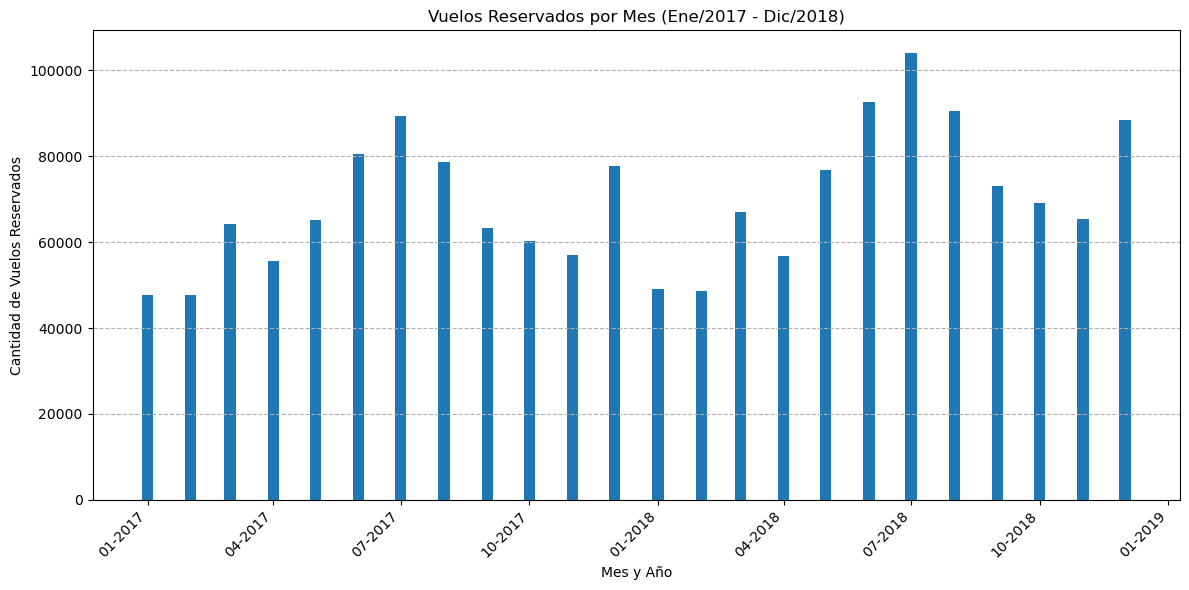

In [10]:
# Gráfico de barras (alternativa)

# 1. Asegúrate de que tu DataFrame esté ordenado cronológicamente.
# Esto es esencial para que las barras se muestren en la secuencia correcta.
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

# 2. Define las fechas de inicio y fin para el filtro.
start_date = '2017-01-01'
end_date = '2018-12-31'

# 3. Filtra el DataFrame para el rango de fechas deseado.
df_filtrado = df_vuelos_por_mes[
    (df_vuelos_por_mes['Date'] >= start_date) & 
    (df_vuelos_por_mes['Date'] <= end_date)
]

# 4. Crea el gráfico de barras.
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Formatea el eje X para mostrar solo mes y año.
date_format = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_format)

# Usa el DataFrame filtrado para generar el gráfico de barras.
plt.bar(df_filtrado['Date'], df_filtrado['Flights Booked'], width=8)

# Añade etiquetas y título.
plt.title('Vuelos Reservados por Mes (Ene/2017 - Dic/2018)')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(axis='y', linestyle='--') # Añade una cuadrícula punteada solo en el eje y

# Mejora la legibilidad de las etiquetas del eje X.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


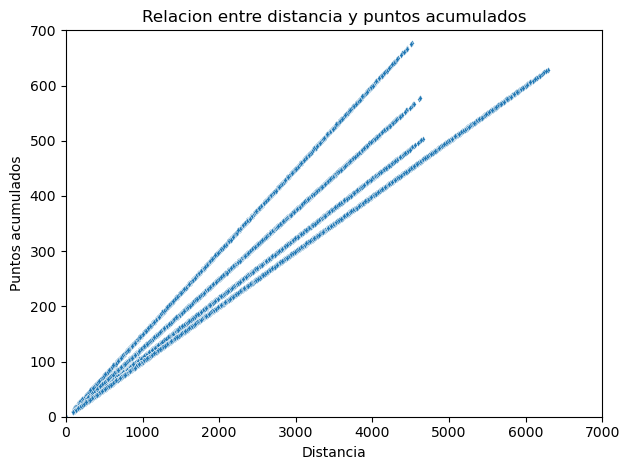

In [11]:
sns.scatterplot(data=df, x = 'Distance', y = 'Points Accumulated', marker='d', s=10);
plt.xlim(0,7000)
plt.ylim(0, 700)
plt.title('Relacion entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show();


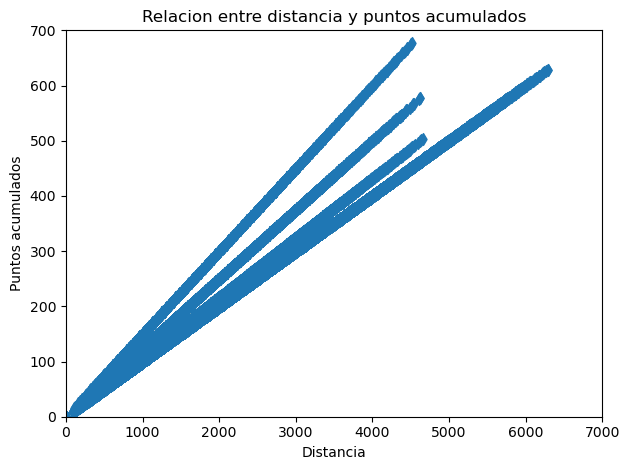

In [12]:
plt.scatter(data=df, x = 'Distance', y = 'Points Accumulated', marker='d' );
plt.xlim(0,7000)
plt.ylim(0, 700)
plt.title('Relacion entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show();

 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [13]:
orden_provincia = df['Province'].value_counts().index

In [14]:
orden_provincia

Index(['Ontario', 'British Columbia', 'Quebec', 'Alberta', 'Manitoba',
       'New Brunswick', 'Nova Scotia', 'Saskatchewan', 'Newfoundland', 'Yukon',
       'Prince Edward Island'],
      dtype='object', name='Province')

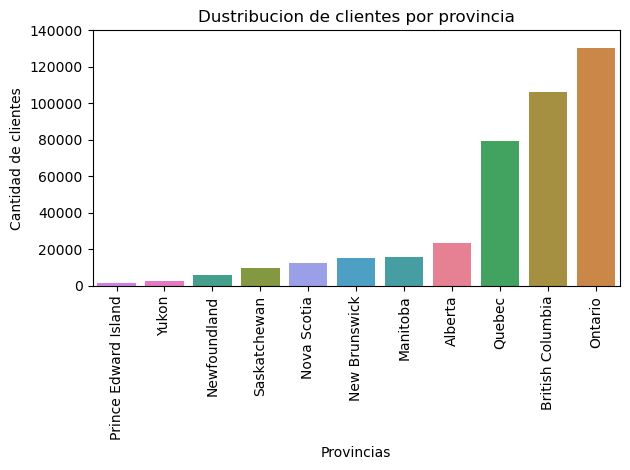

In [15]:
sns.countplot(data = df, x= "Province", hue='Province', order=orden_provincia[::-1])
plt.xticks(rotation = 90)
plt.ylim(0, 140000)
plt.title('Dustribucion de clientes por provincia')
plt.xlabel('Provincias')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show();

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
orden_salario_educacion = df.groupby('Education')['Salary'].mean().reset_index()


In [27]:
orden_salario_educacion.head()

,Education,Salary
0,Bachelor,72599.080913
1,College,79432.699982
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [35]:
orden_salario_educacion.describe()

,Salary
count,5.000000
mean,99063.271597
std,47010.966217
min,61146.378165
25%,72599.080913
50%,79432.699982
75%,103734.523724
max,178403.675202


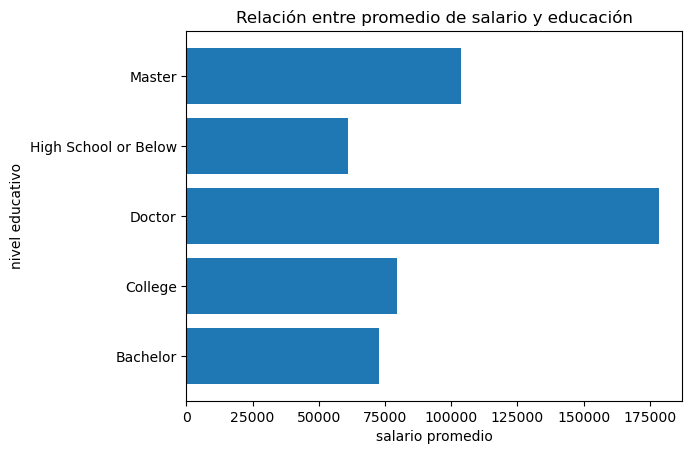

In [33]:
plt.barh(data=orden_salario_educacion, y='Education', width='Salary')
plt.title('Relación entre promedio de salario y educación')
plt.xlabel('salario promedio')
plt.ylabel('nivel educativo');

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [39]:
valores_unicos = df['Loyalty Card'].unique()

In [40]:
valores_unicos

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [46]:
#pieplot
df_recuento = df['Loyalty Card'].value_counts().reset_index()

In [47]:
df_recuento

,Loyalty Card,count
0,Star,183745
1,Nova,136883
2,Aurora,83132


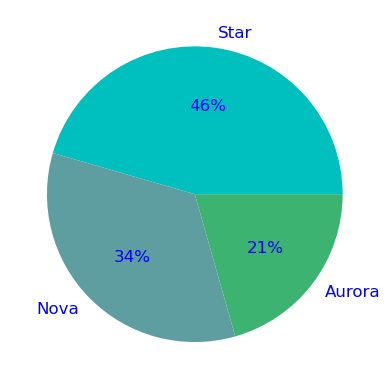

In [49]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.pie(data=df_recuento, x = 'count', labels='Loyalty Card', autopct=  '%.0f%%', colors=colores, textprops={'fontsize': 12, 'color': 'blue'});

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [50]:
df.columns

Index(['Unnamed: 0', 'Loyalty Number', 'Date', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [53]:
valores_unicos = df['Marital Status'].unique()

In [54]:
valores_unicos

array(['Married', 'Single', 'Divorced'], dtype=object)

In [62]:
clientes_genero_salario = pd.crosstab(df['Marital Status'], df['Gender'])


In [63]:
clientes_genero_salario

Gender,Female,Male
Marital Status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


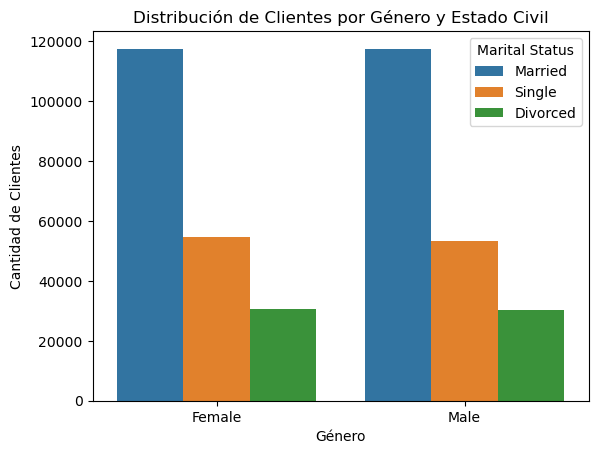

In [68]:
#tabla de frecuencia absoluta
sns.countplot(data=df, x='Gender', hue = 'Marital Status')
plt.title('Distribución de Clientes por Género y Estado Civil')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation = 0);

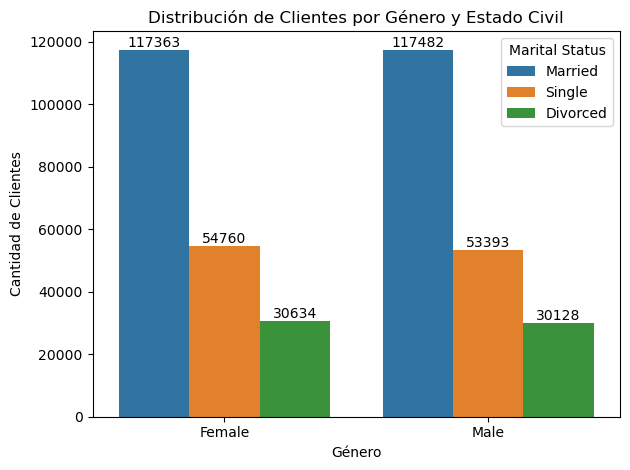

In [69]:
# Asumiendo que 'df' es tu DataFrame y ya has hecho la preparación
# (Este es tu código original, con la adición de las etiquetas)
ax = sns.countplot(data=df, x='Gender', hue = 'Marital Status')
plt.title('Distribución de Clientes por Género y Estado Civil')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')

# 1. Obtener los "contenedores" de las barras (un grupo por cada color)
# 2. Iterar sobre ellos para añadir la etiqueta con el valor de la altura
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation = 0)
plt.tight_layout() # Ajusta automáticamente los parámetros para dar a la figura un diseño ajustado
plt.show()